### Diabetes Case Study

You now have had the opportunity to work with a range of supervised machine learning techniques for both classification and regression.  Before you apply these in the project, let's do one more example to see how the machine learning process works from beginning to end with another popular dataset.

We will start out by reading in the dataset and our necessary libraries.  You will then gain an understanding of how to optimize a number of models using grid searching as you work through the notebook. 

In [1]:
# Import our libraries
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import seaborn as sns
sns.set(style="ticks")

import check_file as ch

%matplotlib inline

# Read in our dataset
diabetes = pd.read_csv('diabetes.csv')

# Take a look at the first few rows of the dataset
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Because this course has been aimed at understanding machine learning techniques, we have largely ignored items related to parts of the data analysis process that come before building machine learning models - exploratory data analysis, feature engineering, data cleaning, and data wrangling.  

> **Step 1:** Let's do a few steps here.  Take a look at some of usual summary statistics calculated to accurately match the values to the appropriate key in the dictionary below. 

#### https://www.kdnuggets.com/2018/12/feature-engineering-explained.html

In [2]:
# Cells for work


In [3]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
diabetes.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [6]:
np.mean(diabetes.Outcome)

0.34895833333333331

#### https://mode.com/example-gallery/python_histogram/

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45462a8908>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f45440be550>]], dtype=object)

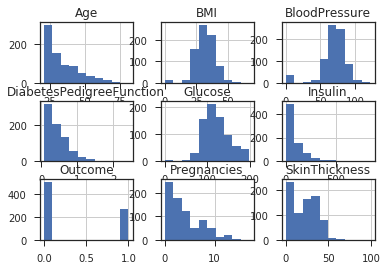

In [7]:
diabetes.hist()

##### variable, not dataset

In [8]:
# Possible keys for the dictionary
a = '0.65'
b = '0'
c = 'Age'
d = '0.35'
e = 'Glucose'
f = '0.5'
g = "More than zero"

# Fill in the dictionary with the correct values here
answers_one = {
    'The proportion of diabetes outcomes in the dataset': d,
    'The number of missing data points in the dataset': b,
    'A dataset with a symmetric distribution': e,
    'A dataset with a right-skewed distribution': c, 
    'This variable has the strongest correlation with the outcome': e
}

# Just to check your answer, don't change this
ch.check_one(answers_one)

Awesome! These all look great!


> **Step 2**: Since our dataset here is quite clean, we will jump straight into the machine learning.  Our goal here is to be able to predict cases of diabetes.  First, you need to identify the y vector and X matrix.  Then, the following code will divide your dataset into training and test data.   

In [9]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [10]:
X = diabetes.iloc[:, :8]
X
y = diabetes['Outcome']
type(y)

pandas.core.series.Series

In [11]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
5,5,116,74,0,0,25.6,0.201,30
6,3,78,50,32,88,31.0,0.248,26
7,10,115,0,0,0,35.3,0.134,29
8,2,197,70,45,543,30.5,0.158,53
9,8,125,96,0,0,0.0,0.232,54


In [12]:
y

0      1
1      0
2      1
3      0
4      1
5      0
6      1
7      0
8      1
9      1
10     0
11     1
12     0
13     1
14     1
15     1
16     1
17     1
18     0
19     1
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
      ..
738    0
739    1
740    1
741    0
742    0
743    1
744    0
745    0
746    1
747    0
748    1
749    1
750    1
751    0
752    0
753    1
754    1
755    1
756    0
757    1
758    0
759    1
760    0
761    1
762    0
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [13]:
y = diabetes['Outcome']
X = diabetes.iloc[:, :8]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now that you have a training and testing dataset, we need to create some models that and ultimately find the best of them.  However, unlike in earlier lessons, where we used the defaults, we can now tune these models to be the very best models they can be.

It can often be difficult (and extremely time consuming) to test all the possible hyperparameter combinations to find the best models.  Therefore, it is often useful to set up a randomized search.  

In practice, randomized searches across hyperparameters have shown to be more time confusing, while still optimizing quite well.  One article related to this topic is available [here](https://blog.h2o.ai/2016/06/hyperparameter-optimization-in-h2o-grid-search-random-search-and-the-future/).  The documentation for using randomized search in sklearn can be found [here](http://scikit-learn.org/stable/auto_examples/model_selection/plot_randomized_search.html#sphx-glr-auto-examples-model-selection-plot-randomized-search-py) and [here](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).

In order to use the randomized search effectively, you will want to have a pretty reasonable understanding of the distributions that best give a sense of your hyperparameters.  Understanding what values are possible for your hyperparameters will allow you to write a grid search that performs well (and doesn't break).

> **Step 3**: In this step, I will show you how to use randomized search, and then you can set up grid searches for the other models in Step 4.  However, you will be helping, as I don't remember exactly what each of the hyperparameters in SVMs do.  Match each hyperparameter to its corresponding tuning functionality.



In [14]:
X_test.shape

(154, 8)

In [15]:
X_test.shape[1]+1

9

In [16]:
# build a classifier
clf_rf = RandomForestClassifier()

# Set up the hyperparameter search
param_dist = {"max_depth": [3, None],
              "n_estimators": list(range(10, 200)),
              "max_features": list(range(1, X_test.shape[1]+1)),
              "min_samples_split": list(range(2, 11)),
              "min_samples_leaf": list(range(1, 11)),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


# Run a randomized search over the hyperparameters
random_search = RandomizedSearchCV(clf_rf, param_distributions=param_dist)

# Fit the model on the training data
random_search.fit(X_train, y_train)

# Make predictions on the test data
rf_preds = random_search.best_estimator_.predict(X_test)

ch.print_metrics(y_test, rf_preds, 'random forest')

random_search.best_estimator_

Accuracy score for random forest : 0.7727272727272727
Precision score random forest : 0.6785714285714286
Recall score random forest : 0.6909090909090909
F1 score random forest : 0.6846846846846847





RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=96, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

> **Step 4**: Now that you have seen how to run a randomized grid search using random forest, try this out for the AdaBoost and SVC classifiers.  You might also decide to try out other classifiers that you saw earlier in the lesson to see what works best.

### AdaBoost

In [17]:
# build a classifier for ada boost
clf_ada = AdaBoostClassifier()
clf_ada

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

## AdaBoost - Mine

In [18]:
# build a classifier for ada boost
clf_ada = AdaBoostClassifier()

# Set up the hyperparameter search
# look at  setting up your search for n_estimators, learning_rate
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
param_dist = {
                "base_estimator": [None],
              "n_estimators": list(range(2, 200)),
              "learning_rate": [0.01,0.05,0.1,0.3,1,1.5,2],
              "algorithm": ["SAMME", "SAMME.R"]
            }

# Run a randomized search over the hyperparameters
ada_search = RandomizedSearchCV(clf_ada, param_distributions=param_dist)

# Fit the model on the training data
ada_search.fit(X_train, y_train)

# Make predictions on the test data
ada_preds = ada_search.best_estimator_.predict(X_test)

# Return your metrics on test data
ch.print_metrics(y_test, ada_preds, 'adaboost')

# view the best model
ada_search.best_estimator_

Accuracy score for adaboost : 0.7467532467532467
Precision score adaboost : 0.6379310344827587
Recall score adaboost : 0.6727272727272727
F1 score adaboost : 0.6548672566371682





AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1,
          n_estimators=134, random_state=None)

## AdaBoost - Theirs

In [19]:
# build a classifier for ada boost
clf_ada = AdaBoostClassifier()

# Set up the hyperparameter search
# look at  setting up your search for n_estimators, learning_rate
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
param_dist = {"n_estimators": [10, 100, 200, 400],
              "learning_rate": [0.001, 0.005, .01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 10, 20]}


# Run a randomized search over the hyperparameters
ada_search = RandomizedSearchCV(clf_ada, param_distributions=param_dist)

# Fit the model on the training data
ada_search.fit(X_train, y_train)

# Make predictions on the test data
ada_preds = ada_search.best_estimator_.predict(X_test)

ch.print_metrics(y_test, ada_preds, 'adaboost')

# view the best model
# random_search.best_estimator_
model = ada_search.best_estimator_

model

Accuracy score for adaboost : 0.7792207792207793
Precision score adaboost : 0.7441860465116279
Recall score adaboost : 0.5818181818181818
F1 score adaboost : 0.6530612244897959





AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=0.4, n_estimators=10, random_state=None)

###### I don't know what other options are for base_estimator

In [20]:
AdaBoostClassifier().get_params().keys()

dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])

## SVC

My SVC takes forever to run

In [21]:
SVC().get_params().keys()

dict_keys(['C', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [22]:
list(np.linspace(0.01, 20, 5))

[0.01, 5.0074999999999994, 10.004999999999999, 15.0025, 20.0]

In [23]:
list(np.linspace(0.001, 10, 11))

[0.001,
 1.0008999999999999,
 2.0007999999999999,
 3.0006999999999997,
 4.0006000000000004,
 5.0005000000000006,
 6.0004,
 7.0003000000000002,
 8.0001999999999995,
 9.0000999999999998,
 10.0]

In [24]:
np.linspace(1, 5, 5)

array([ 1.,  2.,  3.,  4.,  5.])

In [25]:
list(np.linspace(1, 10, 10))

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

https://stackoverflow.com/questions/48373710/sklearn-model-selection-gridsearchcv-valueerror-c-0

ValueError: C <= 0

Change 0 to 0.001

https://stackoverflow.com/questions/36306555/scikit-learn-grid-search-with-svm-regression/36309526
Remove 'precomputed' from your parameter space.
ValueError: X should be a square kernel matrix



In [26]:
# # build a classifier for support vector machines
# clf_svc=SVC()

# # Set up the hyperparameter search
# # look at setting up your search for C (recommend 0-10 range), 
# # kernel, and degree
# # http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# param_dist = {
# "C": list(np.linspace(0.001, 10, 11))
# #     ,
# # "kernel": [#"linear", 
# #     "poly", "rbf"
# #            #, "sigmoid"
# #           # , "precomputed"
# #           ] 
#     #,
# # "degree": list(np.linspace(1, 5, 5))
# }

# # Run a randomized search over the hyperparameters
# random_search = RandomizedSearchCV(clf_svc, param_distributions=param_dist)

# # Fit the model on the training data
# random_search.fit(X_train, y_train)

# # Make predictions on the test data
# svc_preds = random_search.best_estimator_.predict(X_test)

# # Return your metrics on test data
# ch.print_metrics(y_test, svc_preds, 'svc')

# # view the best model
# random_search.best_estimator_

In [27]:
# # build a classifier for support vector machines
# clf_svc=SVC()

# # Set up the hyperparameter search
# # look at setting up your search for C (recommend 0-10 range), 
# # kernel, and degree
# # http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# param_dist = {
# "C": list(np.linspace(0.001, 10, 11))
#      ,
# "kernel": [#"linear", 
#     "poly"
#     #, "rbf"
# #            #, "sigmoid"
# #           # , "precomputed"
#           ] 
#     #,
# # "degree": list(np.linspace(1, 5, 5))
# }

# # Run a randomized search over the hyperparameters
# random_search = RandomizedSearchCV(clf_svc, param_distributions=param_dist)

# # Fit the model on the training data
# random_search.fit(X_train, y_train)

# # Make predictions on the test data
# svc_preds = random_search.best_estimator_.predict(X_test)

# # Return your metrics on test data
# ch.print_metrics(y_test, svc_preds, 'svc')

# # view the best model
# random_search.best_estimator_

## SVC - theirs

In [28]:
# build a classifier for support vector machines
clf_svc = SVC()

# Set up the hyperparameter search
# look at setting up your search for C (recommend 0-10 range), 
# kernel, and degree
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
param_dist = {"C": [0.1, 0.5, 1, 3, 5],
              "kernel": ['linear','rbf']
             }


# Run a randomized search over the hyperparameters
svc_search = RandomizedSearchCV(clf_svc, param_distributions=param_dist)

# Fit the model on the training data
svc_search.fit(X_train, y_train)

# Make predictions on the test data
svc_preds = svc_search.best_estimator_.predict(X_test)

ch.print_metrics(y_test, svc_preds, 'svc')

# view the best model
random_search.best_estimator_

Accuracy score for svc : 0.7532467532467533
Precision score svc : 0.6545454545454545
Recall score svc : 0.6545454545454545
F1 score svc : 0.6545454545454545





RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=4,
            min_weight_fraction_leaf=0.0, n_estimators=96, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

> **Step 5**: Use the test below to see if your best model matched, what we found after running the grid search.  

In [29]:
a = 'randomforest'
b = 'adaboost'
c = 'supportvector'

best_model =  a

# See if your best model was also mine.  
# Notice these might not match depending your search!
ch.check_best(best_model)

That wasn't the model I had in mind... It makes sense to use f1 score to determine best in this case given the imbalance of classes.  There could also be justification for precision or recall being the best metric to use as well - precision showed to be best with adaboost.  With recall, SVMs proved to be the best for our models.


Once you have found your best model, it is also important to understand why it is performing well.  In regression models where you can see the weights, it can be much easier to interpret results. 

> **Step 6**:  Despite the fact that your models here are more difficult to interpret, there are some ways to get an idea of which features are important.  Using the "best model" from the previous question, find the features that were most important in helping determine if an individual would have diabetes or not. Do your conclusions match what you might have expected during the exploratory phase of this notebook?

In [30]:
# Show your work here - the plot below was helpful for me
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python


In [31]:
diabetes.columns[[np.arange(0,8)]]

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [32]:
features=diabetes.columns[[]]
importances = model.feature_importances_
indices = np.argsort(importances)

In [33]:
importances

array([ 0. ,  0.5,  0. ,  0. ,  0. ,  0.2,  0.1,  0.2])

In [34]:
indices

array([0, 2, 3, 4, 6, 5, 7, 1])

In [35]:
range(len(indices))

range(0, 8)

Text(0.5,0,'Relative Importance')

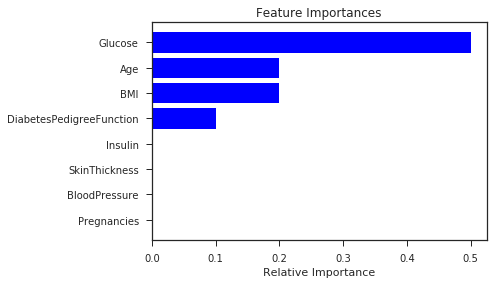

In [36]:
features=list(diabetes.columns[[np.arange(0,8)]])
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
# plt.yticks(range(len(indices)), features['indices'])
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

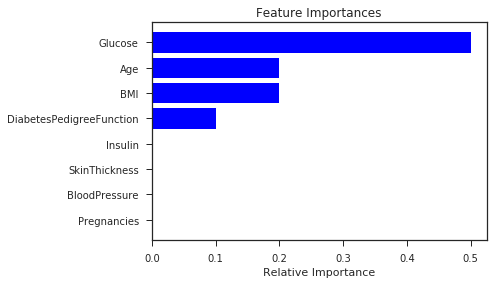

In [37]:
# Show your work here - the plot below was helpful for me
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

features = diabetes.columns[:diabetes.shape[1]]
importances = ada_search.best_estimator_.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance');

In [38]:
list(features)

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [39]:
indices

array([0, 2, 3, 4, 6, 5, 7, 1])

In [40]:
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [41]:
indices

array([0, 2, 3, 4, 6, 5, 7, 1])

> **Step 7**:  Using your results above to complete the dictionary below.

In [42]:
# Check your solution by matching the correct values in the dictionary
# and running this cell
a = 'Age'
b = 'BloodPressure'
c = 'BMI'
d = 'DiabetesPedigreeFunction'
e = 'Insulin'
f = 'Glucose'
g = 'Pregnancy'
h = 'SkinThickness'



sol_seven = {
    'The variable that is most related to the outcome of diabetes' : d,
    'The second most related variable to the outcome of diabetes' : f,
    'The third most related variable to the outcome of diabetes' : c,
    'The fourth most related variable to the outcome of diabetes' : a
}

ch.check_q_seven(sol_seven)

That doesn't look like what I expected, but maybe your feature importances were different - that can definitely happen.  Take a look at the best_estimator_.feature_importances_ portion of your fitted model.


In [43]:
model.feature_importances_ 

array([ 0. ,  0.5,  0. ,  0. ,  0. ,  0.2,  0.1,  0.2])

> **Step 8**:  Now provide a summary of what you did through this notebook, and how you might explain the results to a non-technical individual.  When you are done, check out the solution notebook by clicking the orange icon in the upper left.